# Analysont les données de ventes mensuelles de l'année précédente à l'aide de NumPy et Pandas, puis visualiser les résultats à l'aide de Matplotlib Pour L'entreprise "Innova Electronic"

## - d'identifier les tendances de vente
## - les produits les plus populaires
## - les pics de ventes

In [2]:
# importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [3]:
# loading Data form downloaded file or online file
#df = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/ventes-data-661908823ed76205555507.csv")
def load_data():
    return pd.read_csv("data/ventes-data.csv") 

df_data = load_data()

## Data Exploration

In [4]:
# Data Exploration

def print_summarize_data(df_data):
    # displaying the dimension of our dataframe know the number of lines and columns we are working with
    print("Dataset Dimension")
    print(df_data.shape, "\n")
    
    # Affiche des informations sur les colonnes et les valeurs manquantes
    print("Dataset Informations on each columns")
    print(df_data.info(), "\n")
    
    # looking for missing values in our dataframe
    print("Missing values in our dataset")
    print(df_data.isna().sum(), "\n")

    # diplaying the descriptive stat of each numerical colunms(statistical summary)
    print("Statistical summary")
    print(df_data.describe(),)


print_summarize_data(df_data)

Dataset Dimension
(588, 4) 

Dataset Informations on each columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       588 non-null    object
 1   Product     588 non-null    object
 2   Units Sold  588 non-null    int64 
 3   Revenue     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB
None 

Missing values in our dataset
Month         0
Product       0
Units Sold    0
Revenue       0
dtype: int64 

Statistical summary
        Units Sold        Revenue
count   588.000000     588.000000
mean    489.673469   31221.428571
std     343.815948   27426.671012
min     100.000000    3000.000000
25%     255.000000   12400.000000
50%     382.500000   24000.000000
75%     600.000000   41337.500000
max    2100.000000  210000.000000


## Calculating the sales of each month

In [5]:
# calculation of the total sales of each Month
total_sale_month = df_data.groupby("Month")[["Revenue"]].sum().sort_values(by = "Revenue")
#total_sale_month

In [6]:
# identify the five Most solde Product in each Month
top_products = df_data.groupby(["Product"])[["Units Sold"]].sum()
top_products = top_products.sort_values(by = "Units Sold", ascending = False)
top_products = top_products.head()
#top_products

In [7]:
# month with the higher sale made
print(total_sale_month.idxmax())

Revenue    December
dtype: object


In [8]:
# Month with the lower sale made
print(total_sale_month.idxmin())

Revenue    January
dtype: object


## Visualisations

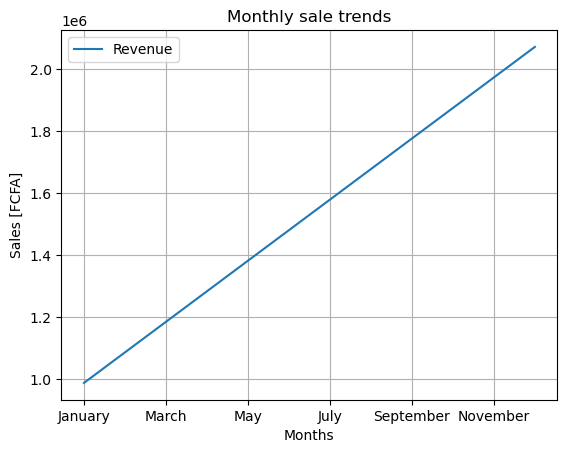

In [9]:
# Monthly total sale trends 
# This graph shows the evolution of total sales within time(months) putting in evidence the trends of global sales
total_sale_month.plot()
plt.xlabel("Months")
plt.ylabel("Sales [FCFA]")
plt.title("Monthly sale trends")
plt.grid(True)

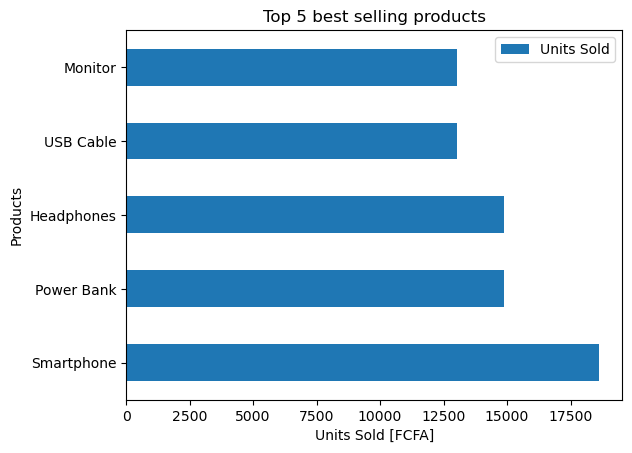

In [10]:
# Most Sold product 
# This graphe shows the most popular products
top_products.plot(kind = "barh")
plt.title("Top 5 best selling products")
plt.xlabel("Units Sold [FCFA]")
plt.ylabel("Products")
plt.show()

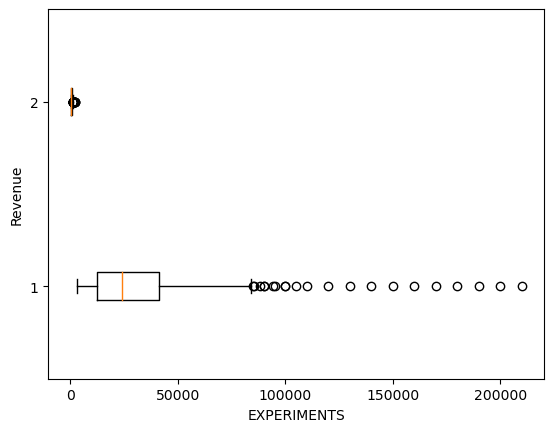

In [22]:
# Ploting a boxplot to see the outliers in our dataset and compare with others.whisker

plt.boxplot(df_data[["Revenue", "Units Sold"]], vert = False)
plt.ylabel("Revenue")
plt.xlabel("EXPERIMENTS")
plt.show()

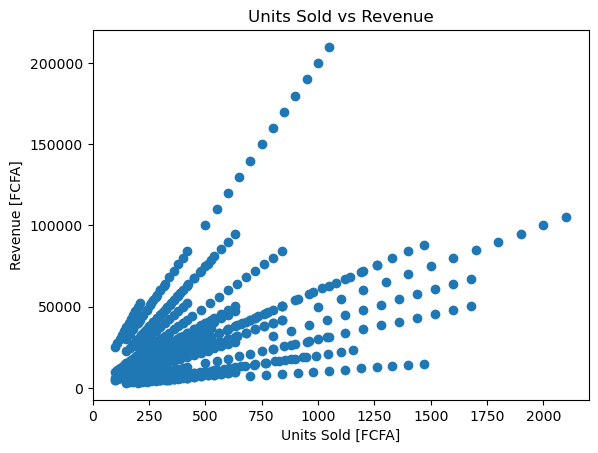

In [15]:
# Scatter plot to see the correlation between the Unit sold and Revenue for each Product

plt.scatter(x = df_data["Units Sold"], y = df_data["Revenue"])
plt.title("Units Sold vs Revenue")
plt.xlabel("Units Sold [FCFA]")
plt.ylabel("Revenue [FCFA]")
plt.show()

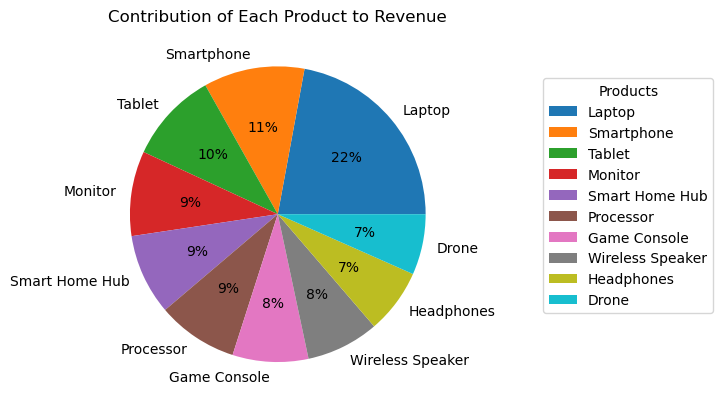

In [16]:
# Pie chart to show the contribution of each product to revenue.
# It helps identify the most significant products in terms of sales.

df_data.groupby("Product").sum().sort_values(by = "Revenue", ascending = False).head(10).plot(kind = "pie", y = "Revenue", autopct='%1.0f%%')
plt.ylabel("")
plt.title("Contribution of Each Product to Revenue")
plt.legend(title="Products",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1.1))
plt.show()